C)

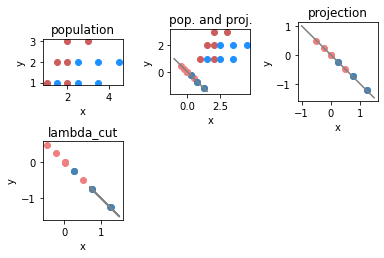

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp

x1 = [1, 2, 1.5, 2, 2, 3]
y1 = [1., 1., 2., 2., 3., 3.]
x2 = [1.5, 2.5, 3.5, 2.5, 3.5, 4.5]
y2 = [1, 1, 1, 2, 2, 2]

xx = np.linspace(-1, 1.5)

# lambda = (-370,367)

# Hilfsebene zur Berechnung des Lotfußpunktes
def H(x,y):
    return -370*x+367*y

# defining projection line function
def lambda_1(x, b=0):
    return -367/370*x + b

plot = plt.figure()
#plot.tight_layout()
plt.subplots_adjust(wspace=0.6)

ax1 = plot.add_subplot(231,aspect='equal',xlabel='x',ylabel='y', title='population')
ax2 = plot.add_subplot(232,aspect='equal',xlabel='x',ylabel='y', title='pop. and proj.')
ax3 = plot.add_subplot(233,aspect='equal',xlabel='x',ylabel='y', title='projection')
ax4 = plot.add_subplot(234,aspect='equal',xlabel='x',ylabel='y', title='lambda_cut')


# plotting the populations and projection line
ax1.scatter(x1, y1, c='indianred')
ax1.scatter(x2, y2, c='dodgerblue')

ax2.scatter(x1, y1, c='indianred')
ax2.scatter(x2, y2, c='dodgerblue')
ax2.plot(xx, lambda_1(xx), c='grey')

ax3.plot(xx, lambda_1(xx), c='grey')

# calculating the parameters for the foot of a dropped perpendicular
for i in range(len(x1)):
    r = H(x1[i],y1[i])
    s = H(x2[i],y2[i])
    
    t, u = smp.symbols('t, u', real = True)
    t_1 = smp.solve(-370*(-370*t)+367*(367*t)-r,t)
    t_2 = smp.solve(-370*(-370*u)+367*(367*u)-s,u)
    
    # plotting the projection
    ax2.scatter(-370*t_1[0],360*t_1[0], c='lightcoral')
    ax2.scatter(-370*t_2[0],360*t_2[0], c='steelblue')
    
    ax3.scatter(-370*t_1[0],360*t_1[0], c='lightcoral')
    ax3.scatter(-370*t_2[0],360*t_2[0], c='steelblue')
    
    # lambda cut
    lambda_cut = 0.7
    xxx = np.linspace(lambda_cut,1.5)
    
    ax4.plot(xxx, lambda_1(xxx), c='grey')
    ax4.scatter(-370*t_1[0],360*t_1[0], c='lightcoral')
    ax4.scatter(-370*t_2[0],360*t_2[0], c='steelblue')
    

Choosing $\lambda_{\text{cut}}=0.7$ because we rather have false negative values than false positive ones.

Counting tp, tn, fn, fp:

tp = 4

tn = 6

fn = 2

fp = 0

Precision = tp/(tp+fp) = 4/(4+0) = 1

Recall = tp/(tp+fn) = 4/(4+2) = 2/3

Accuracy = (tp+tn)/(tp+tn+fn+fp) = (4+6)/(4+6+2) = 5/6